In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance
import mplfinance as mplf

from sklearn.cluster import KMeans

In [2]:
def get_trading_pair(name="BTC-USD", period="5d", interval="30m"):
    # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    btc = yfinance.Ticker(name)
    hist = btc.history(period=period, interval=interval)
    return hist

In [76]:
def get_optimum_clusters(df: pd.DataFrame, saturation_point=0.05):
    '''
    :param df: dataframe
    :param saturation_point: The amount of difference we are willing to detect
    :return: clusters with optimum K centers
    This method uses elbow method to find the optimum number of K clusters
    We initialize different K-means with 1..10 centers and compare the inertias
    If the difference is no more than saturation_point, we choose that as K and move on
    '''

    wcss = []
    k_models = []

    size = min(11, len(df.index))
    for i in range(1, size):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
        k_models.append(kmeans)

    # Compare differences in inertias until it's no more than saturation_point
    optimum_k = len(wcss)-1
    for i in range(0, len(wcss)-1):
        diff = abs(wcss[i+1] - wcss[i])
        
        if diff < saturation_point:
            optimum_k = i
            break

    print("Optimum K is " + str(optimum_k + 1))
    optimum_clusters = k_models[optimum_k]

    return optimum_clusters

def get_clusters(n, df: pd.DataFrame):
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    return kmeans

def get_levels(clusters):
    centroids = clusters.cluster_centers_
    centroids = np.sort(centroids, axis=0).reshape(-1)
    return centroids

def plot_levels(data: pd.DataFrame, variations: [], titles: []=None, labels: bool=False, figratio=(16,9)):
    
    if titles and len(titles) != len(variations):
        
        return "Titles and args should have same shape, debug input"
    
    custom_style = mplf.make_mpf_style(base_mpf_style='charles', rc={
        "axes.labelcolor": "none",
        "axes.spines.bottom": False,
        "axes.spines.left": False,
        "axes.spines.right": False,
        "axes.spines.top": False,
        "font.size": 0,
        "xtick.color": "none",
        "ytick.color": "none",
    })

    
    fig = mplf.figure(style="charles", figsize=figratio)
    
    fig.subplots_adjust(wspace=0.1)
    fig.subplots_adjust(hspace=0.1)

    # subplot that takes  x y n, where n is the position
    # and x and y are proportions given to each plot from total space
    x, y = len(variations) // 2 + 1, 2 if len(variations) > 1 else 1
    lw = 2 if len(variations) == 1 else 1
    
    for n, i in enumerate(variations):
        ax = fig.add_subplot(x,y,n+1)
        
        title = titles[n] if titles else ''
        mplf.plot(data, type='candle', ax=ax, axtitle=title, hlines=dict(hlines=[*i],linestyle='dotted',linewidths=(lw), colors='black'), savefig='test-mplfiance.png')
        
        if not labels:
            ax.set_xticklabels([])
            ax.set_yticklabels([])

In [74]:
def get_support_resistance(name, period, interval, n=None):
    # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    data = get_trading_pair(name=name, period=period, interval=interval)
    
    data = data.drop(columns=['Volume', 'Dividends', 'Stock Splits'])
        
    lows = pd.DataFrame(data=data, index=data.index, columns=["Low"])
    highs = pd.DataFrame(data=data, index=data.index, columns=["High"])
    
    # open_ = pd.DataFrame(data=data, index=data.index, columns=["Open"])
    # close_ = pd.DataFrame(data=data, index=data.index, columns=["Close"])
    
    if n:
        lowc = get_levels(get_clusters(df=lows, n=n))
        highc = get_levels(get_clusters(df=highs, n=n))
    else:
        lowc = get_levels(get_optimum_clusters(lows))
        highc = get_levels(get_optimum_clusters(highs))
        
        # openc = get_levels(get_optimum_clusters(open_))
        # closec = get_levels(get_optimum_clusters(close_))

    plot_levels(
        data=data,
        variations=[lowc], 
        titles=[f"{name}, period: {period}, interval: {interval}"])

DIFF 53275928.27512595
DIFF 9579512.33147901
DIFF 2175105.1355144875
DIFF 705427.446752606
DIFF 658271.3555716488
DIFF 482731.14667206607
DIFF 162160.14551482198
DIFF 151684.58878045552
DIFF 109083.87879102188
Optimum K is 10
DIFF 56298218.34339737
DIFF 9748654.732411388
DIFF 2277371.4685496236
DIFF 892715.9724195544
DIFF 585131.4867345293
DIFF 412245.2558000188
DIFF 390174.9803660378
DIFF 126723.47711108846
DIFF 99283.89329360914
Optimum K is 10


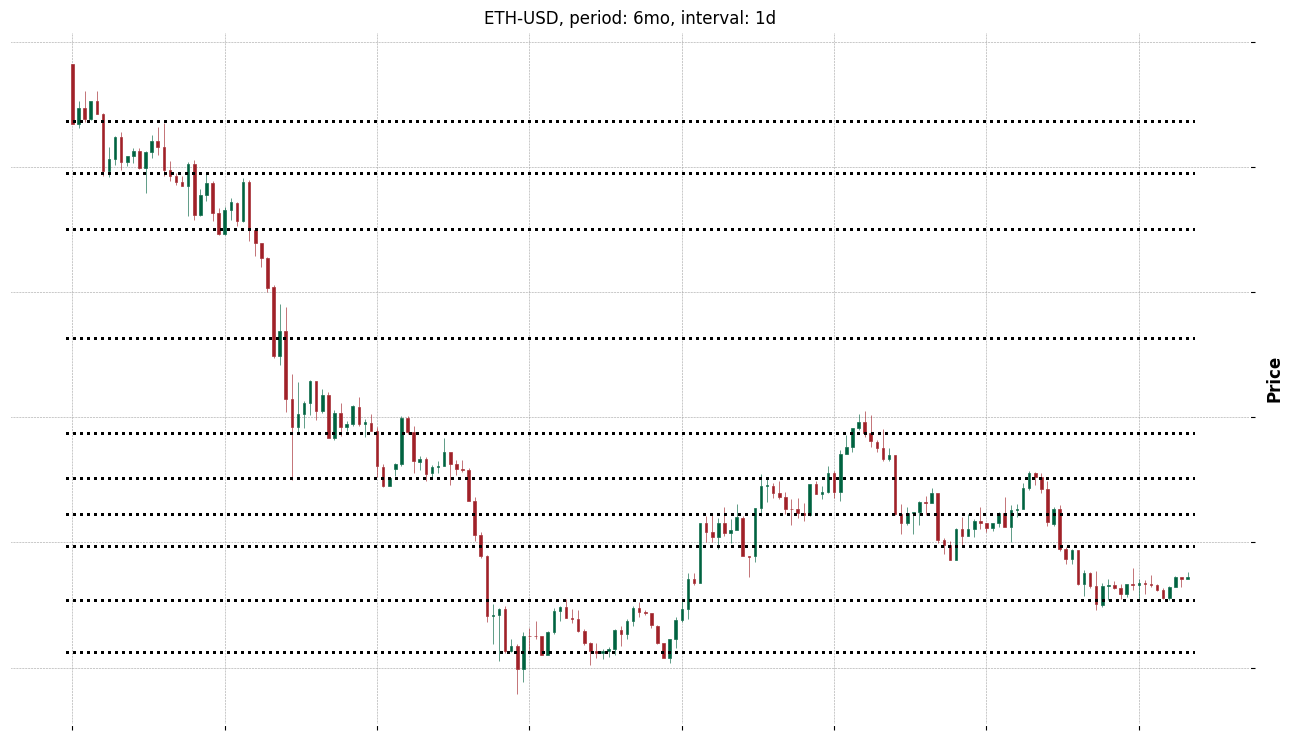

In [75]:
get_support_resistance("ETH-USD", "6mo", "1d")

In [113]:
def get_optimum_clusters(df: pd.DataFrame, saturation_point=0.001):
    '''
    :param df: dataframe
    :param saturation_point: The amount of difference we are willing to detect
    :return: clusters with optimum K centers
    This method uses elbow method to find the optimum number of K clusters
    We initialize different K-means with 1..10 centers and compare the inertias
    If the difference is no more than saturation_point, we choose that as K and move on
    '''

    wcss = []
    k_models = []

    size = min(11, len(df.index))
    for i in range(1, size):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df)
        print(i, ':', kmeans.inertia_)
        wcss.append(kmeans.inertia_)
        k_models.append(kmeans)

    # Compare differences in inertias until it's no more than saturation_point
    optimum_k = len(wcss)-1
    for i in range(0, len(wcss)-1):
        diff = abs(wcss[i+1] - wcss[i])
        if diff < saturation_point:
            optimum_k = i
            break

    print("Optimum K is " + str(optimum_k + 1))
    optimum_clusters = k_models[optimum_k]

    return wcss

df = pd.DataFrame(data, index=data.index, columns=["Low"])
scaled_df = df / df.max(axis=0)
inertia = get_optimum_clusters(df=scaled_df)

1 : 0.1023459124265851
2 : 0.012727463891293887
3 : 0.006361711037319351
4 : 0.003152110663428929
5 : 0.002152224796270393
6 : 0.0013097078523321363
7 : 0.0010273508315518864
8 : 0.0007845096336093835
9 : 0.00060406001647355
10 : 0.0005262055250925698
Optimum K is 4


ValueError: x and y must have same first dimension, but have shapes (225, 1) and (10,)

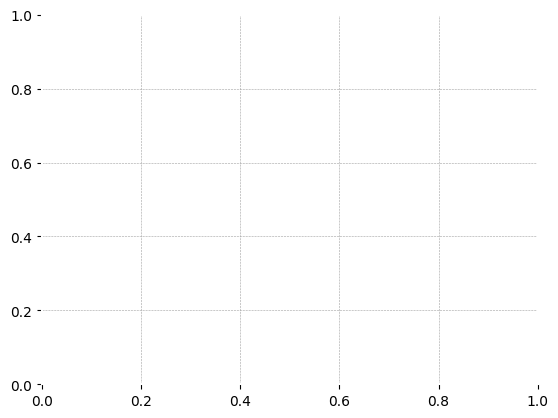

In [116]:
plt.plot(df, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()